In [1]:
from model import VQModel

import torch

In [2]:
model = VQModel().eval()

Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


In [3]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)

68718467

In [4]:
sd = torch.load('../weights/vqgan.ckpt', map_location='cpu')['state_dict']
model.load_state_dict(sd, strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['custom_layer.weight', 'custom_layer.bias'])

In [5]:
from model.vqgan.image_tokenizer import ImageTokenizer
tokenizer = ImageTokenizer(model)

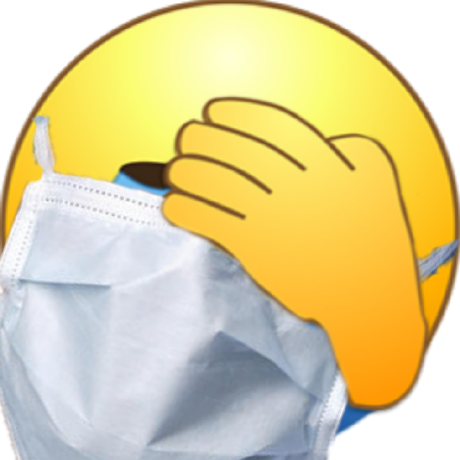

In [6]:
import requests
from io import BytesIO
from PIL import Image
image_url = 'https://avatars.githubusercontent.com/u/25450242?v=4'
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
image

In [7]:
tokens = tokenizer.img_tokens_from_pil([image, image.copy()])
tokens

tensor([[2638, 6363, 2638,  ..., 6363, 3158,  573],
        [2638, 6363, 2638,  ..., 6363, 3158,  573]])

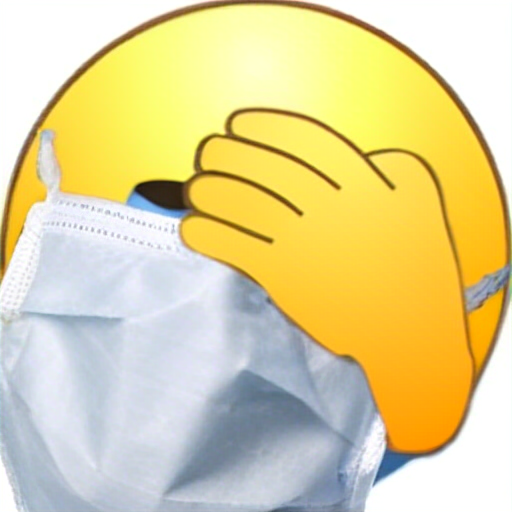

In [8]:
reconstructed_image = tokenizer.pil_from_img_toks(tokens)
reconstructed_image[1]